# Project Description

You work for the OilyGiant mining company. Your task is to find the best place for a new well.
Steps to choose the location:

- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

## Import Packages

In [1]:
#import packages
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
!pip install yellowbrick
from yellowbrick.regressor import ResidualsPlot
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
!pip install pandas-profiling[notebook]
from pandas_profiling import ProfileReport

### Conclusions

| Package          | Description                                                          |
|:-----------------|:---------------------------------------------------------------------|
| pandas           | For data preprocessing and basic descriptive statistics.             |  
| numpy            | For adding support for large, multi-dimensional arrays and matrices. |
| matplotlib       | For data visualizations.                                             |
| seaborn          | For data visualizations                                              |
| pandas_profiling | For creating a profile report on the dataset.                        |
| warnings         | For ignoring warnings after finishing the project for readability.   |
| sklearn          | For running machine learning models.                                 |
| yellowbrick      | For machine learning visualizations.                                 |

## Data Description

### Import Data

In [2]:
#import data
try:
    geo_0 = pd.read_csv('/Users/bnoah/data/geo_data_0.csv')
except:
    geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
try:
    geo_1 = pd.read_csv('/Users/bnoah/data/geo_data_1.csv')
except:
    geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
try:
    geo_2 = pd.read_csv('/Users/bnoah/data/geo_data_2.csv')
except:
    geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

### Profile Reports

#### Geo Data 0

In [7]:
geo_0_report = ProfileReport(geo_0, title="Geo Data 0 Profiling Report")
geo_0_report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

#### Geo Data 1

In [8]:
geo_1_report = ProfileReport(geo_1, title="Geo Data 1 Profiling Report")
geo_1_report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

#### Geo Data 2

In [6]:
geo_2_report = ProfileReport(geo_2, title="Geo Data 2 Profiling Report")
geo_2_report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Conclusions

I imported the data and looked through the information. In this dataset, 
- The target variable is `product`.
- The features are `f0`, `f1`, and `f2`. 
- The unique identifier is `id`. 

Based on the information above we can also see:

- In Geo Data 0:
    - `id` has 10 duplicate values.
    - `f0` has a symmetric distribution with 4 peaks around -1, 0, 1, and 2. 
    - `f1` has a symmetric trimodal distribution with 3 peaks around -0.5, 0.25, and 1. 
    - `f2` has a normal distribution centered around 2.5.
    - `product` has a symmetric distribution that has peaks at 25, 50, 75, 100, 125, and 150. 
- In Geo Data 1:
    - `id` has 4 duplicate values.
    - `f0` has a symmetric bimodal with 2 peaks around -10, and 10.
    - `f1` has a normal distribution centered around -5. 
    - `f2` has a nearly discrete distribution with values clumped around integers from 0 to 5. 
    - `product` has only 12 unique values between 0 and 138. 
- In Geo Data 2:
    - `id` has 4 duplicate values.
    - `f0` has a normal distribution centered around 0. 
    - `f1` has a normal distribution centered around 0. 
    - `f2` has a normal distribution centered around 2.5.
    - `product` has a distribution similar to `product` from Geo Data 0. 

## Clean and Prepare Data

In [9]:
#drop ids that are duplicates
geo_0.drop_duplicates(subset='id',keep=False,inplace=True)
geo_1.drop_duplicates(subset='id',keep=False,inplace=True)
geo_2.drop_duplicates(subset='id',keep=False,inplace=True)
# #remove id
geo_0.drop('id',axis=1,inplace=True)
geo_1.drop('id',axis=1,inplace=True)
geo_2.drop('id',axis=1,inplace=True)
#reset indices
geo_0.reset_index(drop=True,inplace=True)
geo_1.reset_index(drop=True,inplace=True)
geo_2.reset_index(drop=True,inplace=True)

### Conclusions

Since I would expect zero duplicates and cannot explain the reasoning behind it without consulting the data engineer, I decided to remove all observations that have a duplicate `id` value. 

I then dropped the `id` variable from the datasets because it will not be used in the data analysis. 

Lastly, I reset the indices to help with future calculations. 

## Train and Test 

### Splitting Into Training and Validating Datasets

In [49]:
#split all three regions into training and validating sets
geo_0_train, geo_0_valid = train_test_split(geo_0, test_size=0.25, random_state=13)
geo_1_train, geo_1_valid = train_test_split(geo_1, test_size=0.25, random_state=13)
geo_2_train, geo_2_valid = train_test_split(geo_2, test_size=0.25, random_state=13)

#split by features and targets
geo_0_train_target = geo_0_train['product'].reset_index(drop=True)
geo_0_valid_target = geo_0_valid['product'].reset_index(drop=True)
geo_1_train_target = geo_1_train['product'].reset_index(drop=True)
geo_1_valid_target = geo_1_valid['product'].reset_index(drop=True)
geo_2_train_target = geo_2_train['product'].reset_index(drop=True)
geo_2_valid_target = geo_2_valid['product'].reset_index(drop=True)

geo_0_train_features = geo_0_train.drop('product', axis=1).reset_index(drop=True)
geo_0_valid_features = geo_0_valid.drop('product', axis=1).reset_index(drop=True)
geo_1_train_features = geo_1_train.drop('product', axis=1).reset_index(drop=True)
geo_1_valid_features = geo_1_valid.drop('product', axis=1).reset_index(drop=True)
geo_2_train_features = geo_2_train.drop('product', axis=1).reset_index(drop=True)
geo_2_valid_features = geo_2_valid.drop('product', axis=1).reset_index(drop=True)

#### Conclusions

I split each of the three regions using a 75% train, 25% validate ratio. 

### Train Models

For Region 0, the root mean squared error for a linear model is 37.41
For Region 0, the average volume of the predicted reserve is 92.72


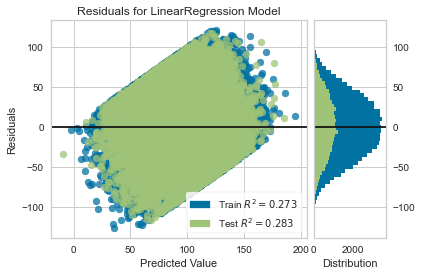

For Region 1, the root mean squared error for a linear model is 0.9
For Region 1, the average volume of the predicted reserve is 68.85


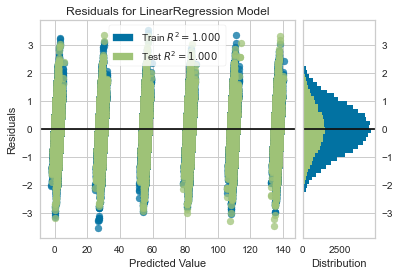

For Region 2, the root mean squared error for a linear model is 40.27
For Region 2, the average volume of the predicted reserve is 95.12


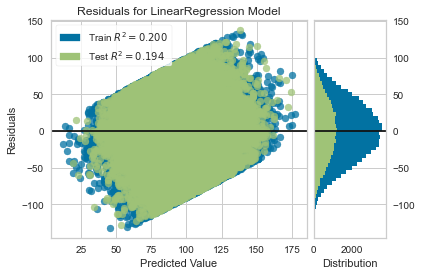

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
model_0 = LinearRegression()
model_0.fit(geo_0_train_features,geo_0_train_target)
target_pred_0 = model_0.predict(geo_0_valid_features)
print('For Region 0, the root mean squared error for a linear model is', round(mean_squared_error(geo_0_valid_target,target_pred_0,squared=False),2))
print('For Region 0, the average volume of the predicted reserve is', round(target_pred_0.mean(),2))
visualizer = ResidualsPlot(model_0)
visualizer.fit(geo_0_train_features,geo_0_train_target)  # Fit the training data to the visualizer
visualizer.score(geo_0_valid_features,geo_0_valid_target)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

model_1 = LinearRegression()
model_1.fit(geo_1_train_features,geo_1_train_target)
target_pred_1 = model_1.predict(geo_1_valid_features)
print('For Region 1, the root mean squared error for a linear model is', round(mean_squared_error(geo_1_valid_target,target_pred_1,squared=False),2))
print('For Region 1, the average volume of the predicted reserve is', round(target_pred_1.mean(),2))
visualizer = ResidualsPlot(model_1)
visualizer.fit(geo_1_train_features,geo_1_train_target)  # Fit the training data to the visualizer
visualizer.score(geo_1_valid_features,geo_1_valid_target)  # Evaluate the model on the test data
visualizer.show()       

model_2 = LinearRegression()
model_2.fit(geo_2_train_features,geo_2_train_target)
target_pred_2 = model_2.predict(geo_2_valid_features)
print('For Region 2, the root mean squared error for a linear model is', round(mean_squared_error(geo_2_valid_target,target_pred_2,squared=False),2))
print('For Region 2, the average volume of the predicted reserve is', round(target_pred_2.mean(),2))
visualizer = ResidualsPlot(model_2)
visualizer.fit(geo_2_train_features,geo_2_train_target)  # Fit the training data to the visualizer
visualizer.score(geo_2_valid_features,geo_2_valid_target)  # Evaluate the model on the test data
visualizer.show()  

#### Conclusions

In this section, I trained three linear regression models (one for each region), and then looked at the average predicted volume per reserve, the root mean squared error, and the graph of the residuals. 

For region 0: 
- The average predicted volume of a reserve was **92.72 thousand barrels**.
- The root mean squared error of the linear regression model was **37.41**.
- The residual graph showed a normal distribution with a fairly low maximum. 

For region 1: 
- The average predicted volume of a reserve was **68.85 thousand barrels**.
- The root mean squared error of the linear regression model was **0.9**.
- The residual graph showed a pattern where volume seems to not be normally distributed in the region. It looks as though volume is clumped around 6 values (0, ~30, ~60, ~80, ~110, and ~140). 
- It also seems as though the model was able to identify which group very well based on the root mean squared error.  

For region 2:
- The average predicted volume of a reserve was **95.12 thousand barrels**.
- The root mean squared error of the linear regression model was **40.27**.
- The residual graph showed a normal distribution with a fairly low maximum. 


Overall:
- Region 0 and region 2 showed very similar patterns which larger average predicted values, but the model had a difficult time predicting values closely. 
- Contrastingly, region 1 had a much lower average predicted value, but the model did a much better job at getting close to the predicted values. 

## Profit Calculation

In [40]:
budget_per_well = 500000
rev_per_barrel = 4.5
#the point where revenue equals costs
break_even = 500000/(4.5*1000)
print('Wells need to supply at least', round(break_even), 'units to be profitable.')
print('The average well in region 0 supplies', round(geo_0['product'].mean(),2), 'units.')
print('The average well in region 1 supplies', round(geo_1['product'].mean(),2), 'units.')
print('The average well in region 2 supplies', round(geo_2['product'].mean(),2), 'units.')

Wells need to supply at least 111 units to be profitable.
The average well in region 0 supplies 92.5 units.
The average well in region 1 supplies 68.82 units.
The average well in region 2 supplies 95.0 units.


### Conclusions

From the calculations, we can see that, to be profitable, wells need to supply at least **111 units**. None of the regions have averages that high, so picking at random is not likely to provide a profitable outcome. Yet, if one had to pick at random, regions 0 and 2 would be the best choices as their average is **over 20 units** higher. 

## Profit From Highest Predicted Wells

In [7]:
#Region 0
top_200_pred_0 = pd.Series(target_pred_0).sort_values(ascending=False)[:200]
top_200_true_0 = geo_0_valid_target[top_200_pred_0.index]
print('The predicted average of the top 200 predicted volumes in region 0 is', round(top_200_pred_0.mean(),2), 'units.')
print('The actual average of the top 200 predicted volumes in region 0 is', round(top_200_true_0.mean(),2), 'units.')
print('The actual average of all wells in region 0 is', round(geo_0['product'].mean(),2), 'units.')
print('\n')

#Region 1
top_200_pred_1 = pd.Series(target_pred_1).sort_values(ascending=False)[:200]
top_200_true_1 = geo_1_valid_target[top_200_pred_1.index]
print('The predicted average of the top 200 predicted volumes in region 1 is', round(top_200_pred_1.mean(),2), 'units.')
print('The actual average of the top 200 predicted volumes in region 1 is', round(top_200_true_1.mean(),2), 'units.')
print('The actual average of all wells in region 1 is', round(geo_1['product'].mean(),2), 'units.')
print('\n')

#Region 2
top_200_pred_2 = pd.Series(target_pred_2).sort_values(ascending=False)[:200]
top_200_true_2 = geo_2_valid_target[top_200_pred_2.index]
print('The predicted average of the top 200 predicted volumes in region 2 is', round(top_200_pred_2.mean(),2), 'units.')
print('The actual average of the top 200 predicted volumes in region 2 is', round(top_200_true_2.mean(),2), 'units.')
print('The actual average of all wells in region 2 is', round(geo_2['product'].mean(),2), 'units.')
print('\n')

The predicted average of the top 200 predicted volumes in region 0 is 154.61 units.
The actual average of the top 200 predicted volumes in region 0 is 147.23 units.
The actual average of all wells in region 0 is 92.5 units.


The predicted average of the top 200 predicted volumes in region 1 is 138.75 units.
The actual average of the top 200 predicted volumes in region 1 is 137.95 units.
The actual average of all wells in region 1 is 68.82 units.


The predicted average of the top 200 predicted volumes in region 2 is 149.29 units.
The actual average of the top 200 predicted volumes in region 2 is 138.81 units.
The actual average of all wells in region 2 is 95.0 units.




### Conclusions

In this step, I looked at how many units the top 200 predicted wells from each region would actually produce. In this case, region 0 would produce the most with **47.23 units**, region 2 is next with **138.81 units**, and region 1 came in last with **137.95 units**. In reality, this is not very helpful as we will not have access to choose from around 25,000 wells per region. It also does not account for any variability in the choices available. 

## Bootstrapping

### Model

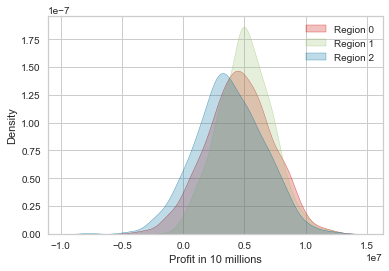

In [52]:
#random state
state = np.random.RandomState(13)

#function to calculate profit
def profit(target,prediction,count):
    predict_sorted = prediction.sort_values(ascending=False)
    selected=target[predict_sorted.index][:count]
    return 4500*selected.sum()-100000000

#region 0
#where profit values will be stored
values_0 = []
for i in range(1000):
    #get target values for 500 random observations
    target_subsample = geo_0_valid_target.sample(n=500,replace=True,random_state=state)
    #get the prediction values for those 500 random observations
    predict_subsample = pd.Series(target_pred_0)[target_subsample.index]
    #calculate the profit and add it to the values list
    values_0.append(profit(target_subsample,predict_subsample,200))
#convert to a series
values_0 = pd.Series(values_0)
#create a histogram of the profit values
sns.kdeplot(values_0,shade=True,color='r',label='Region 0')

#region 1
#where profit values will be stored
values_1 = []
for i in range(1000):
    #get target values for 500 random observations
    target_subsample = geo_1_valid_target.sample(n=500,replace=True,random_state=state)
    #get the prediction values for those 500 random observations
    predict_subsample = pd.Series(target_pred_1)[target_subsample.index]
    #calculate the profit and add it to the values list
    values_1.append(profit(target_subsample,predict_subsample,200))
#convert to a series
values_1 = pd.Series(values_1)
#create a histogram of the profit values
sns.kdeplot(values_1,shade=True,color='g',label='Region 1')

#region 2
#where profit values will be stored
values_2 = []
for i in range(1000):
    #get target values for 500 random observations
    target_subsample = geo_2_valid_target.sample(n=500,replace=True,random_state=state)
    #get the prediction values for those 500 random observations
    predict_subsample = pd.Series(target_pred_2)[target_subsample.index]
    #calculate the profit and add it to the values list
    values_2.append(profit(target_subsample,predict_subsample,200))
#convert to a series
values_2 = pd.Series(values_2)
#create a histogram of the profit values
sns.kdeplot(values_2,shade=True,color='b',label='Region 2')
#add labels to the histogram with all three regions
plt.xlabel("Profit in 10 millions")
plt.ylabel("Density")
plt. legend() 
plt.show()

#### Conclusions

For the bootstrapping model, I looked at 1000 samples of 500 wells chose the top 200 wells by predicted volume. I then calculated the profit for each sample and displayed the distribution of profits for each region in the histogram above. The reason I looked at 500 wells is to hopefully simulate real world possibilities with regards to the options available when OilyGiant is deciding on new fracking locations.

The histogram above shows that, while the average profits seem to be fairly similar, region 0 has more extreme high-profit outcomes, but also have more extreme low-profit outcomes than region 1. As for region 2, it seems to be statistically dominated by both regions 0 and 1. 

### Risk Evaluation

In [53]:
#region 0 
#find the mean
mean_0 = round(values_0.mean(),2)
#calculate the confident interval
confid_int_0 = st.t.interval(alpha=0.95, df=len(values_0)-1, loc=np.mean(values_0), scale=st.sem(values_0)) 
confid_int_0_round = (round(confid_int_0[0], 2), round(confid_int_0[1], 2))
#calculate the percentage of trials that produced negative profits
losses_0 = []
for x in values_0.index:
    if values_0[x] < 0:
        losses_0.append(1)
    else:
        losses_0.append(0)
loss_percent_0 = round(pd.Series(losses_0).mean()*100,2)

#region 1
#find the mean
mean_1 = round(values_1.mean(),2)
#calculate the confident interval
confid_int_1 = st.t.interval(alpha=0.95, df=len(values_1)-1, loc=np.mean(values_1), scale=st.sem(values_1)) 
confid_int_1_round = (round(confid_int_1[0], 2), round(confid_int_1[1], 2))
#calculate the percentage of trials that produced negative profits
losses_1 = []
for x in values_1.index:
    if values_1[x] < 0:
        losses_1.append(1)
    else:
        losses_1.append(0)
loss_percent_1 = round(pd.Series(losses_1).mean()*100,2)        

#region 2
#find the mean
mean_2 = round(values_2.mean(),2)
#calculate the confident interval
confid_int_2 = st.t.interval(alpha=0.95, df=len(values_2)-1, loc=np.mean(values_2), scale=st.sem(values_2)) 
confid_int_2_round = (round(confid_int_2[0], 2), round(confid_int_2[1], 2))
#calculate the percentage of trials that produced negative profits
losses_2 = []
for x in values_2.index:
    if values_2[x] < 0:
        losses_2.append(1)
    else:
        losses_2.append(0)
loss_percent_2 = round(pd.Series(losses_2).mean()*100,2)  
#print the means, confidence intervals and loss percentages for each region
print('Region 0: \n \t Mean:', mean_0, '\n \t Confidence Interval:',confid_int_0_round, '\n \t Loss Percentage:',loss_percent_0)
print('Region 1: \n \t Mean:', mean_1, '\n \t Confidence Interval:',confid_int_1_round, '\n \t Loss Percentage:',loss_percent_1)
print('Region 2: \n \t Mean:', mean_2, '\n \t Confidence Interval:',confid_int_2_round, '\n \t Loss Percentage:',loss_percent_2)

Region 0: 
 	 Mean: 4552572.24 
 	 Confidence Interval: (4385894.37, 4719250.11) 
 	 Loss Percentage: 4.6
Region 1: 
 	 Mean: 5046653.47 
 	 Confidence Interval: (4909451.32, 5183855.62) 
 	 Loss Percentage: 0.7
Region 2: 
 	 Mean: 3746185.63 
 	 Confidence Interval: (3572736.39, 3919634.87) 
 	 Loss Percentage: 8.6


#### Conclusions

Overall, region 1 has the highest mean profit with the lowest loss percentage. For that reason, it is clear that region 1 is the recommended choice as an area for OilyGiant to build new wells. 

## Overall Conclusions

In this project, I looked at which of three regions is an optimal choice for OilyGiant to build new wells. 
- I used linear regression models that used 3 factors to predict the volume of a new well. 
- Afterward, I looked at regions with the overall highest performing wells. 
- Lastly, I bootstrapped the data from each region to simulate realistic scenarios of choices OilyGiant will have to make when choosing wells in a specific region.

Overall, it is clear that simple statistics can lead one astray when making choices. If someone just looked at the average volume per well per location, they would have never considered region 1. Yet, due to the clumping nature of the data, the linear regression model was able to identify high-volume wells with much greater accuracy than in other regions. This led to the model significantly outperforming the two other regions, in terms of profit and loss percentage, even with lower average volume. 